# SGD Regression


A maioria dos aplicativos de aprendizado de máquina / aprendizado profundo usa uma variante de descida de gradiente chamada descida de gradiente estocástico (SGD), na qual, em vez de atualizar parâmetros com base na derivada do conjunto de dados em cada etapa, você atualiza com base na derivada de uma amostra escolhida aleatoriamente . Além de ser menos tributável computacionalmente, a pesquisa mostrou que a aleatoriedade envolvida no SGD permite convergir e superar os mínimos locais mais rapidamente.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\2ºsemestre\\Ciência dos dados\\Proj3\\CD_Projeto3'

In [3]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")
dados

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
5,Canada,North America,north,7.404,922,42.349,240,122,100
6,Netherlands,Western Europe,north,7.339,928,45.638,251,88,190
7,New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175
8,Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212
9,Sweden,Western Europe,north,7.291,932,51.845,152,60,186


In [4]:
GPD = dados["GDP_PerCapita"]
beer = dados["Beer_PerCapita"]

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


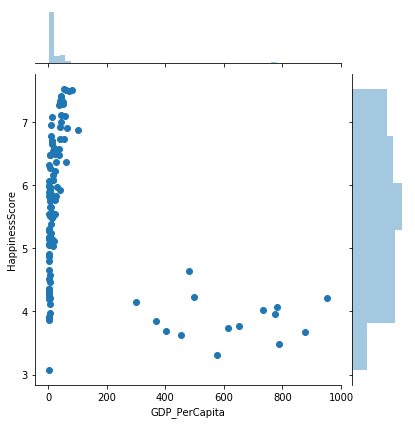

In [6]:
sns.jointplot(GPD, happi);
plt.show()

In [7]:
M=1

In [8]:
def learn(M):
    j = random.randint(0, len(GPD) - 1) # escolher uma amostra
    deriv = 2*(M*GPD[j] - happi[j])*M   # calculo da derivada 
    M = M - 0.005*deriv                   # SGD update step
    return M

In [9]:
print ("Valor inicial de M: ", M)
for i in range(0, 2000):
    M = learn(M)
    if i % 100 == 0:
        print ("Perda: ", evaluate(M), "(M =", M, ")")

Valor inicial de M:  1


NameError: name 'evaluate' is not defined

## Testando códigos do livro!!

In [1]:
from sklearn.linear_model import SGDRegressor

In [14]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [20]:
sgd_reg.fit(GPD, beer)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[ 53.579  79.866  60.53   70.89   43.433  42.349  45.638  40.332  49.897
  51.845  37.181  44.731  57.589  11.733  42.233   8.639  41.261  64.1
 100.739   8.444  55.243  40.412  13.961  14.333  12.654  18.484  38.518
  15.298  24.771   5.757  36.87    5.979  59.324  26.617   4.141   5.871
  22.561  16.352  15.692  16.53    3.769   2.144   2.106  30.669   6.019
   4.96   38.972   7.715   1.913   8.748  12.415  27.105   3.117  14.913
   5.023  21.65    6.031   6.389   9.682  14.07   23.541   4.078   9.532
  17.737   4.879  12.299  10.863   4.088   3.881   2.951   8.117   1.22
   5.426   4.809   7.029   6.794   2.893  12.82    8.257  19.872   4.834
   2.171   3.689  17.882   3.694   2.176   2.375   1.263   4.132 481.
   4.561   1.375   5.28    3.548   3.606   1.463   2.186   1.517   1.712
   3.866 498.    953.      7.469   1.029 300.      7.079 780.    735.
   6.954 775.      1.535   1.27    3.309 368.    651.    614.    402.
 878.    455.    789.    577.      2.058].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(None, None)